In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.1
  [8d63f2c5] + DispatchDoctor v0.4.22
  [ffbed154] + DocStringExtensio

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [4]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [5]:
df_1 = df.loc[df['reference_eccentricity'] < 0.01]
df_2 = df_1.loc[df_1["reference_dimensionless_spin1_x"] < 0.001]
df_3 = df_2.loc[df_2["reference_dimensionless_spin2_x"] < 0.001]
df_4 = df_3.loc[df_3["reference_dimensionless_spin1_y"] < 0.001]
df_5 = df_4.loc[df_4["reference_dimensionless_spin2_y"] < 0.001]
df_6 = df_5.loc[df_5["deprecated"] == False]
df_7 = df_6.loc[np.isfinite(df_6["common_horizon_time"])]

print(len(df_7))

848


In [11]:
ID_num = 109
event = sxs.load(f"SXS:BBH:0{ID_num}", ignore_deprecation=True)
with pd.option_context("max_colwidth", 46, "display.max_rows", None, "display.large_repr", "truncate"):
    display(event.series)

deprecated                                                                      False
reference_mass_ratio                                                         5.002185
reference_chi_eff                                                           -0.416321
reference_chi1_perp                                                               0.0
reference_chi2_perp                                                               0.0
reference_eccentricity                                                       0.001107
reference_eccentricity_bound                                                 0.001107
reference_time                                                                  340.0
reference_dimensionless_spin1_x                                                   0.0
reference_dimensionless_spin1_y                                                  -0.0
reference_dimensionless_spin1_z                                             -0.499549
reference_dimensionless_spin1_mag                     

In [6]:
ref_orb_period = 2*np.pi/df_7["reference_orbital_frequency_mag"]
CHT = df_7["common_horizon_time"] - df_7["reference_time"]

In [7]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

def nu(q):
    return q/(q+1)**2

In [8]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)

best_avg_error = 100

In [9]:
model = PySRRegressor(
    niterations=30,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    elementwise_loss="loss(prediction, target, w) = ((prediction - target)/w)^2"
    # ^ Custom loss function (julia syntax). It takes the difference of the Newtonian residual from the PySR estimation and weights it by the inverse
    #of the length of the original simulation
)

In [ ]:

#Here, we fit to the residuals between the Newtonian predictions for common horizon time and the common horizon times found by simulation. This model
#uses regular mass ratio as a parameter, and all plots are made with mass ratio q

num = 100
Newt_Residual = Newtonian_CHT([ref_orb_period, df_7["reference_mass_ratio"]]) - CHT
init_param = np.column_stack((ref_orb_period, df_7["reference_mass_ratio"], df_7["reference_dimensionless_spin1_z"], df_7["reference_dimensionless_spin2_z"]))

for i in range(num):
    model.fit(init_param, Newt_Residual, weights = CHT)
    Residual_pred = model.predict(init_param)
    current_avg_error = 100*np.sqrt(np.power((Newt_Residual - Residual_pred)/CHT, 2)).mean() 
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())
    plt.scatter(df_7["reference_mass_ratio"], 100*(Newt_Residual - Residual_pred)/CHT, marker = ".", label = "PySR")
    plt.xlabel("q")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")

    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        plt.savefig(f"spin_model_{round(best_avg_error, 3)}.png")
        with open(f'spin_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"spin_model_{round(current_avg_error, 3)}.png")
        with open(f'spin_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)

    plt.close()

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.050e+04
Progress: 670 / 900 total iterations (74.444%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.17
3           4.194e-06  2.458e-01  y = x₁ * 231.57
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = x₁ * (x₀ * (0.62086 - x₂))
9           3.672e-07  3.447e-01  y = (((0.6156 - x₂) * x₁) - x₃) * x₀
11          2.285e-07  2.371e-01  y = x₀ * (((x₁ * (0.49503 - x₂)) - x₃) + 0.55287)
13          1.515e-07  2.054e-01  y = x₀ * ((((x₂ + -0.67702) * -0.79846) * (x₁ - -0.80237))...
                                       - x₃)
15          1.364e-07  5.252e-02  y = (((x₂ + -0.6786) * ((x₁ - -0.92488) * -0.81358)) - x₃)...


[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150100_DMZcNC/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 705.88
3           4.194e-06  2.458e-01  y = x₁ * 231.54
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = x₁ * ((0.62083 - x₂) * x₀)
9           3.671e-07  3.447e-01  y = x₀ * (((0.61396 - x₂) * x₁) - x₃)
11          2.294e-07  2.351e-01  y = x₀ * ((((0.50851 - x₂) * x₁) + 0.51006) - x₃)
12          1.902e-07  1.871e-01  y = x₀ * (((0.56484 - x₂) * (x₁ + inv(x₁))) - x₃)
13          1.898e-07  2.194e-03  y = x₀ * (((inv(square(x₁)) + x₁) * (0.58585 - x₂)) - x₃)
14          1.324e-07  3.600e-01  y = (((inv(x₁) + x₁) * (0.66639 - x₂)) - x₃) * (x₀ + -29.1...
                                      25)
16          1.139e-07  7.524e-02  y = (((inv(x₁) + x₁) * (0.674

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0625349290039523
Best Prediction Average Error (%): 2.227772955857522
Current Model Formula: (x0 - 29.124502)*(-x3 + (0.6663933 - x2)*(x1 + 1/x1))
  - outputs/20250703_150109_V4RAhV/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           4.194e-06  2.458e-01  y = x₁ * 231.57
5           3.027e-06  1.631e-01  y = (x₁ - x₂) * x₀
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = ((0.62086 - x₂) * x₀) * x₁
9           3.671e-07  3.447e-01  y = x₀ * (((0.61396 - x₂) * x₁) - x₃)
11          2.285e-07  2.371e-01  y = x₀ * ((((0.49617 - x₂) * x₁) - x₃) + 0.54778)
13          2.223e-07  1.380e-02  y = ((((0.49617 - x₂) * x₁) - x₃) + 0.54778) * (x₀ - x₁)
15          2.086e-07  3.176e-02  y = ((x₁ * 0.48786) + ((0.5575 - x₃) - (x₂ * (x₁ - -0.2772...
                                      8)))) * x₀
17          1.079e-07  3.296e-01  y = (((0.70097 * x₁) - (x₃ - 0.54017)) - (x₂ * (x₁ - -0.99...
                                      842))) * (x₀ - 70.665)
19          1.075e-07  1.928e-03  y 

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150114_3uZk5F/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           4.194e-06  2.458e-01  y = x₁ * 231.58
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = (x₁ * (0.62086 - x₂)) * x₀
9           3.671e-07  3.447e-01  y = x₀ * ((x₁ * (0.61394 - x₂)) - x₃)
11          2.285e-07  2.370e-01  y = x₀ * ((((0.49416 - x₂) * x₁) + 0.55685) - x₃)
12          1.902e-07  1.833e-01  y = x₀ * (((0.56482 - x₂) * (x₁ + inv(x₁))) - x₃)
13          1.289e-07  3.895e-01  y = (x₀ + -52.303) * (((0.63158 - x₂) * (x₁ + 0.9977)) - x...
                                      ₃)
15          1.128e-07  6.639e-02  y = (x₀ + -55.68) * ((((0.65825 - x₂) * 0.95974) * (x₁ + 0...
                                      .98574)) - x₃)
20     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.141818964873399
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 52.302753)*(-x3 + (0.63158053 - x2)*(x1 + 0.99770427))
  - outputs/20250703_150121_XCcnmb/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.24
3           4.194e-06  2.458e-01  y = x₁ * 231.58
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = (x₀ * (0.62085 - x₂)) * x₁
9           5.636e-07  1.304e-01  y = x₀ * (((0.49451 - x₂) * x₁) - x₃)
10          4.812e-07  1.581e-01  y = (x₀ * (0.5723 - x₂)) * (inv(x₁) + x₁)
11          2.285e-07  7.446e-01  y = x₀ * (((0.49451 - x₂) * x₁) + (0.54706 - x₃))
13          2.178e-07  2.404e-02  y = (((0.53026 - x₂) * x₁) + (0.48956 - x₃)) * (x₀ - x₁)
15          2.144e-07  7.966e-03  y = ((((0.53026 - x₂) * x₁) + 0.48956) - x₃) * ((x₀ - x₁) ...
                                      - x₁)
17          2.124e-07  4.643e-03  y = (x₀ - ((0.53462 - x₂) * x₁)) * (0.47872 + (((0.53462 -...
                          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(



Expressions evaluated per second: 1.410e+05
Progress: 848 / 900 total iterations (94.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.27
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = (x₁ - x₂) * x₀
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = x₁ * ((0.62087 - x₂) * x₀)
9           3.671e-07  3.447e-01  y = (((0.61396 - x₂) * x₁) - x₃) * x₀
11          2.304e-07  2.330e-01  y = ((x₁ * (0.51358 - x₂)) - (-0.51091 + x₃)) * x₀
13          2.175e-07  2.873e-02  y = (((0.52055 - x₂) * x₁) - (x₃ + -0.51674)) * (x₀ - x₁)
15          2.090e-07  1.998e-02  y = (x₀ - 8.0379) * ((((x₁ + 0.2604) * (0.51845 - x₂)) - x...
                                      ₃) - -0.5

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.33
3           4.194e-06  2.458e-01  y = x₁ * 231.58
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = (x₀ * (0.62086 - x₂)) * x₁
9           3.671e-07  3.447e-01  y = x₀ * (((0.61397 - x₂) * x₁) - x₃)
11          2.285e-07  2.371e-01  y = x₀ * (((x₁ * (0.49609 - x₂)) - x₃) - -0.54888)
13          1.644e-07  1.647e-01  y = ((x₃ - ((x₁ - -1.0086) * (0.63741 - x₂))) * x₀) * -0.8...
                                      0689
15          1.637e-07  2.099e-03  y = ((x₃ - ((x₁ - -1.0086) * (0.63741 - x₂))) * (x₀ + -0.8...
                                      0689)) * -0.80689
16          1.452e-07  1.201e-01  y = x₀ * (((inv(x₀) - (x₁ - -1.0603)) * ((0.63828 - x₂) * ...
                                      -0.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.500e+05
Progress: 859 / 900 total iterations (95.444%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.28
3           4.194e-06  2.458e-01  y = x₁ * 231.57
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = (0.62083 - x₂) * (x₀ * x₁)
9           3.671e-07  3.447e-01  y = x₀ * ((x₁ * (0.61397 - x₂)) - x₃)
11          2.322e-07  2.290e-01  y = ((x₁ * (0.5206 - x₂)) - (x₃ - 0.46538)) * x₀
13          1.436e-07  2.402e-01  y = (((0.59822 - x₂) * (x₁ - -0.68086)) - x₃) * (x₀ + -39....
                                      715)
15          1.291e-07  5.350e-02  y = (((x₁ - -0.68086) * (0.59822 - x₂)) - (x₃ - 0.12565)) ...
  

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_150144_RqItOL/hall_of_fame.csv

Expressions evaluated per second: 1.410e+05
Progress: 894 / 900 total iterations (99.333%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = (x₁ - x₂) * x₀
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = (x₀ * (0.62083 - x₂)) * x₁
9           3.679e-07  3.436e-01  y = ((x₁ * (0.62166 - x₂)) - x₃) * x₀
11          2.285e-07  2.382e-01  y = (((x₁ * (0.49636 - x₂)) - x₃) - -0.5475) * x₀
13          1.707e-07  1.459e-01  y = (x₀ * -0.84545) * (x₃ + ((-0.75886 - x₁) * (0.63595 - ...
                                      x₂)))
15          1.674e-07  9.665e-03  y = ((x₃ +

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150151_Y9OpK4/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.29
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = (0.62083 - x₂) * (x₁ * x₀)
9           3.671e-07  3.447e-01  y = x₀ * ((x₁ * (0.61397 - x₂)) - x₃)
11          2.285e-07  2.371e-01  y = ((((0.49629 - x₂) * x₁) - -0.54726) - x₃) * x₀
13          2.176e-07  2.431e-02  y = (x₀ - x₁) * ((((0.52812 - x₂) * x₁) + 0.49403) - x₃)
15          1.437e-07  2.076e-01  y = (((x₁ + (0.77383 - (x₁ * 0.21245))) * (0.66028 - x₂)) ...
                                      - x₃) * x₀
17          1.430e-07  2.342e-03  y = (((0.66028 - x₂) * (0.77383 + (x₁ - (x₁ * 0.21245)))) ...
                                      - x₃) 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150157_3fz8Fb/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.2
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.433e-07  1.313e+00  y = x₀ * (x₁ * (0.65008 - x₂))
9           4.820e-07  2.166e-01  y = (x₂ - 0.62048) * ((x₃ - x₁) * x₀)
11          2.723e-07  2.856e-01  y = x₀ * (((-0.32657 - x₁) * (x₂ - 0.56931)) - x₃)
13          1.470e-07  3.083e-01  y = (((-0.87503 - x₁) * ((x₂ - 0.65081) * 0.81553)) - x₃) ...
                                      * x₀
15          1.456e-07  4.799e-03  y = ((((-1.1011 - x₁) * ((x₂ - 0.67292) * 0.76012)) - x₃) ...
                                      * x₀) - x₂
17          1.449e-07  2.215e-03  y = ((((x₂ - 0.63975) * 0.8202) * (-0.87088 - x₁)) - x₃) *.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_150203_5oqywx/hall_of_fame.csv
Current Prediction Average Error (%): 2.095189939287716
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.51613575 - 0.78678566*x2)*(x1 + 1.009091))


[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sy

Current Prediction Average Error (%): 2.0659163308786654
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 59.88122)*(-x3 + (0.67620933 - x2)*(x1 + 0.73085225))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0449880280125075
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1*23.440147)*(-x3 + (0.6522106 - x2)*(-0.12757841*x1 + x1 + 0.7667311))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.137519417566518
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (-x1 - 1.0687667)*(x2*0.7730337 - 1*0.5089147)) - (x1 + x3)


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.1141517088583366
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1*69.16492)*(-x3 + (0.6811802 - x2)*(x1 - 1*(-0.92053765)))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.063229689044101
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.6259267 - x2)*(x1 + 1/x1)*0.9266015)


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.4104765178880343
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(x2**3 - (x3 - 0.87079614*(0.57486874 - x2)*(x1 - 1*(-1.1378067))))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0487733159339436
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (62.7906 - x0)*(x3 + (0.65950227 - x2)*(-x1 - 0.922795))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.058051626727603
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (x1 + 0.89518744)*(x2*(-0.8292903) - 1*(-0.52579755)))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.020308533621869
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1*60.151627)*(-x3 + (0.65926594 - x2)*(x1 - 1*(-0.8464105)))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.2759076172879324
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(x1 - x3 + (-x2 - 0.55697536)*(x1*0.921583 + 0.52547777) + 0.8692176)


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0394694233608077
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 62.287495)*(-x3 + (0.666988 - x2)*(x1 + 0.83711493))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0338049266767877
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 62.119144)*(-x3 + (0.65541965 - x2)*(x1 + 0.9041269))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.2474163638085103
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.5652744 - x2)*(x1 + 1/x1))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0659249010775715
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 42.577225)*(-x3 + (0.6764746 - x2)*(x1 + 1/x1))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0226833752115243
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1.0931121*32.328312)*(-x3 + (0.649668 - x2)*(x1 + 1/x1))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0874849706325853
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.65228665 - x2)*(x1 - 1*(-0.99303))*0.7919869)


In [15]:
with open("best_model_0.446.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

loaded_model.sympy()

#\sqrt{\frac{13.21 \tau^\frac{3}{2}}{q} - 13.21q^2(656.67 - 0.03 \tau^2}

sqrt(13.208489*x0**(3/2)/x1 - 13.208489*x1**2*(656.6745 - 0.033914566*x0**2))

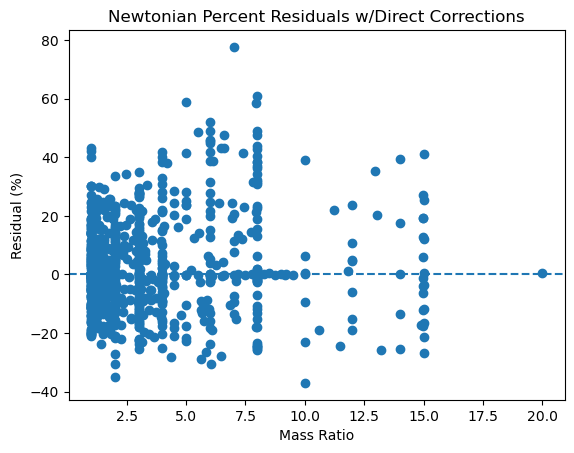

In [16]:
direct_corrections = loaded_model.predict(init_param)

plt.scatter(df_7["reference_mass_ratio"], 100*(Newtonian_CHT([ref_orb_period, df_7["reference_mass_ratio"]]) - direct_corrections - CHT)/CHT)
plt.axhline(0, linestyle = '--')
plt.xlabel("Mass Ratio")
plt.ylabel("Residual (%)")
plt.title("Newtonian Percent Residuals w/Direct Corrections")
plt.savefig(r"Newtonian_Percent_Residuals_with_Direct_Corrections.png")
#I suppose it makes sense that my model fitted to non-spinning black hole mergers doesn't do very well when I test it on black holes with nonzero spin